# Preprocessing for ECG Classification

The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [11]:
normal_df = pd.read_csv("./Data/ptbdb_normal.csv").iloc[:, :-1]
anomaly_df = pd.read_csv("./Data/ptbdb_abnormal.csv").iloc[:, :-1]

In [12]:
print("Shape of Normal data", normal_df.shape)
print("Shape of Abnormal data", anomaly_df.shape)

Shape of Normal data (4045, 187)
Shape of Abnormal data (10505, 187)


Below code will generate a visual comparison between two randomly selected ECG signals samples: 
one from the "Normal" dataset and the other from the "Anomaly" dataset. 
This side-by-side plot enables a direct visual assessment of ECG signal patterns between normal and anomalous cases.

In [13]:
def plot_sample(normal, anomaly):

    # generate 2 random integers within a specified range
    index = np.random.randint(0, len(normal_df), 2)
    
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,4))
    ax[0].plot(normal.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[0].plot(normal.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[0].set_title("Normal")
    
    ax[1].plot(anomaly.iloc[index[0], :].values, label=f"Case {index[0]}")
    ax[1].plot(anomaly.iloc[index[1], :].values, label=f"Case {index[1]}")
    ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
    ax[1].set_title("Anomaly")
    
    plt.tight_layout()
    plt.show()

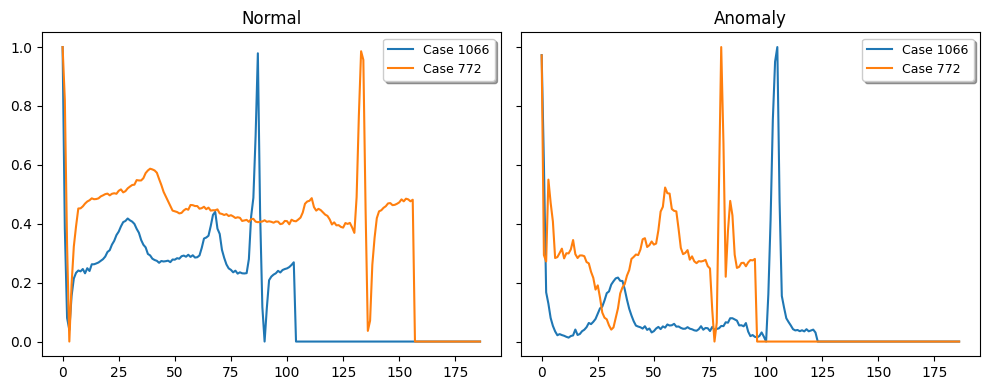

In [14]:
plot_sample(normal_df, anomaly_df)

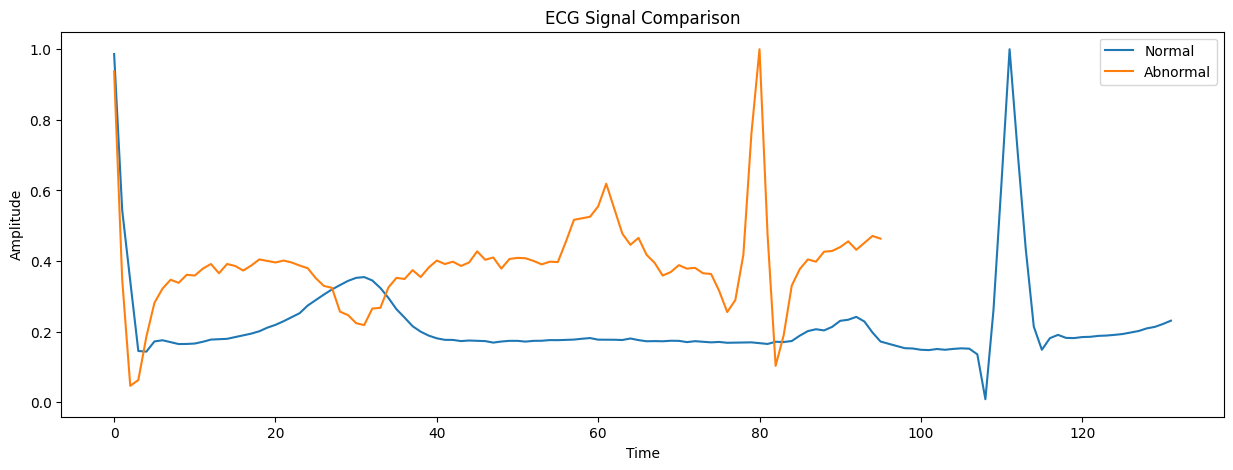

In [15]:
# samples one random row from the DataFrame, Only positive values are retained in the list.

sample_normal = normal_df.iloc[:,:-1].sample(1).values.flatten()
sample_normal = [s for s in sample_normal if s > 0]
sample_abnormal = anomaly_df.iloc[:,:-1].sample(1).values.flatten()
sample_abnormal = [s for s in sample_abnormal if s > 0]

# Visualize the first few samples
plt.figure(figsize=(15, 5))
plt.plot(sample_normal, label='Normal')
plt.plot(sample_abnormal, label='Abnormal')
plt.title('ECG Signal Comparison')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

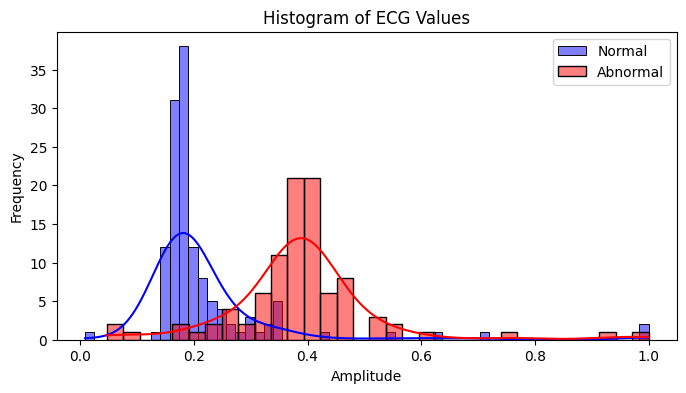

In [16]:
# Plot histograms
plt.figure(figsize=(8, 4))
sns.histplot(sample_normal,
             kde=True,
             color='blue',
             label='Normal')
sns.histplot(sample_abnormal,
             kde=True,
             color='red',
             label='Abnormal')
plt.title('Histogram of ECG Values')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.legend()
plt.show()

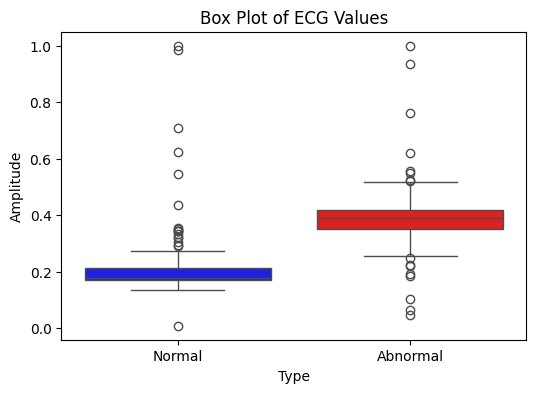

In [17]:
# Plot box plots
plt.figure(figsize=(6, 4))
sns.boxplot(data=[sample_normal, sample_abnormal],
            palette=['blue', 'red'])
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.title('Box Plot of ECG Values')
plt.xlabel('Type')
plt.ylabel('Amplitude')
plt.show()

# Decomposition in Time Series Analysis

Time series decomposition involves breaking down a time series into several components to better understand its structure and behavior.

The main components are:

1. Trend: The long-term progression or direction in the data.
2. Seasonality: The repeating short-term cycle in the series.
3. Residual: The remaining part after removing the trend and seasonality, which represents random noise or irregular patterns.

# Interpreting Decomposition for Heart Beat

1. Trend: Helps identify whether the heart's electrical activity is increasing or decreasing over time.
2. Seasonality: May reveal periodic cycles, like regular heartbeats.
3. Residual: Indicates anomalies or noise after removing trend and seasonality.

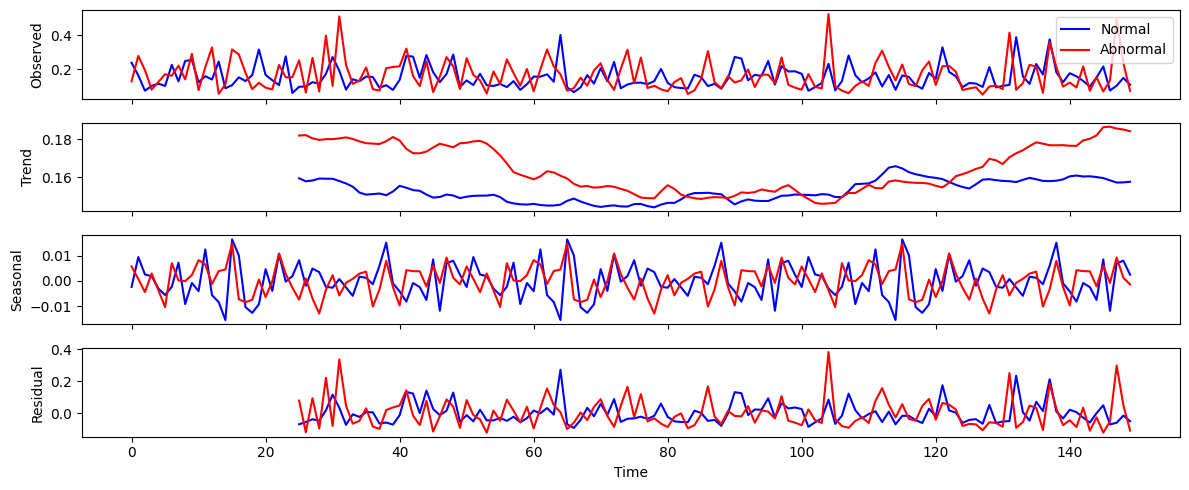

In [19]:
normal_df['value'] = normal_df.mean(axis=1)
anomaly_df['value'] = anomaly_df.mean(axis=1)

# Decompose the time series
decomposition_normal = seasonal_decompose(normal_df['value'], period=50, model='additive')
decomposition_abnormal = seasonal_decompose(anomaly_df['value'], period=50, model='additive')

# Plot the decomposition results for a segment
segment = slice(0, 150)  # Adjust the segment as needed

fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)

# Observed
axes[0].plot(decomposition_normal.observed[segment], color='blue', label='Normal')
axes[0].plot(decomposition_abnormal.observed[segment], color='red', label='Abnormal')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(decomposition_normal.trend[segment], color='blue', label='Normal')
axes[1].plot(decomposition_abnormal.trend[segment], color='red', label='Abnormal')
axes[1].set_ylabel('Trend')

# Seasonal
axes[2].plot(decomposition_normal.seasonal[segment], color='blue', label='Normal')
axes[2].plot(decomposition_abnormal.seasonal[segment], color='red', label='Abnormal')
axes[2].set_ylabel('Seasonal')

# Residual
axes[3].plot(decomposition_normal.resid[segment], color='blue', label='Normal')
axes[3].plot(decomposition_abnormal.resid[segment], color='red', label='Abnormal')
axes[3].set_ylabel('Residual')

axes[3].set_xlabel('Time')

plt.tight_layout()
plt.show()

# Analyzing the Seasonality Graph

Looking at the provided seasonality graph of normal and abnormal heartbeat data:

1. Seasonal Patterns: Both the normal (blue) and abnormal (red) signals exhibit repeating patterns, suggesting the presence of seasonality.

2. Visual Analysis: The peaks and troughs repeat at regular intervals, indicating that both datasets have seasonal components. Interpretation

Seasonality in ECG Data: The presence of seasonality in heartbeat data can be linked to the natural rhythm of the heartbeats. This is normal and expected in biological signals.

# Analyzing the Trend Component

From the trend graph provided:

1. Normal ECG (Blue): The trend remains relatively flat with minor fluctuations, indicating a stable baseline heart activity.
2. Abnormal ECG (Red): The trend shows more pronounced fluctuations and higher values, indicating variability and potentially unstable heart activity over time.

# Interpretation

1. Presence of Trend: Both normal and abnormal ECG data exhibit trends. The normal ECG trend is more stable, while the abnormal ECG trend shows greater variability and higher values.
2. Clinical Implication: A stable trend in normal ECG suggests consistent heart function, whereas the fluctuating trend in abnormal ECG may indicate underlying cardiac issues that require further investigation.

# Rolling Statistics and Stationarity Check

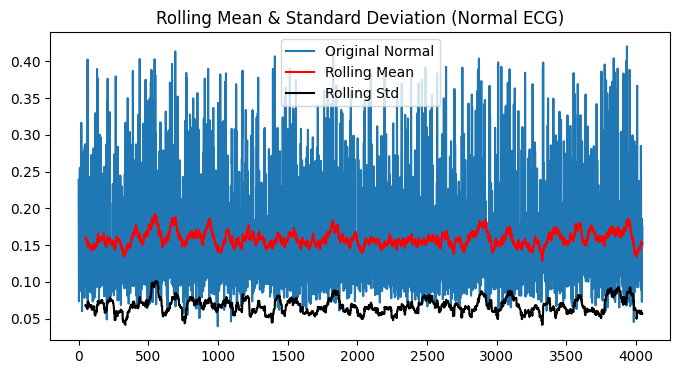

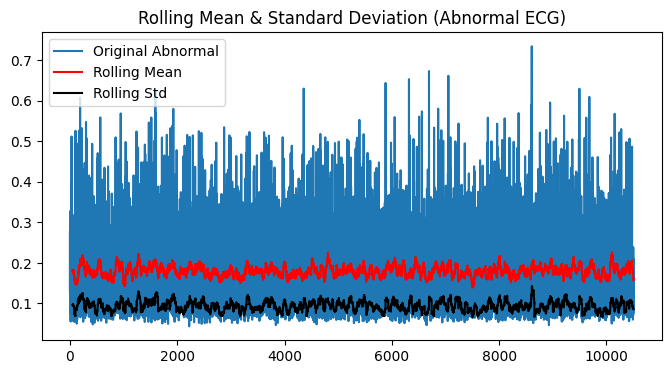

ADF Statistic (Normal): -62.62031787466003
p-value (Normal): 0.0
ADF Statistic (Abnormal): -102.07257011953998
p-value (Abnormal): 0.0


In [20]:
# Calculate rolling statistics
rolling_mean_normal = normal_df['value'].rolling(window=50).mean()
rolling_std_normal = normal_df['value'].rolling(window=50).std()

rolling_mean_abnormal = anomaly_df['value'].rolling(window=50).mean()
rolling_std_abnormal = anomaly_df['value'].rolling(window=50).std()

plt.figure(figsize=(8, 4))
plt.plot(normal_df['value'], label='Original Normal')
plt.plot(rolling_mean_normal, color='red', label='Rolling Mean')
plt.plot(rolling_std_normal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Normal ECG)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(anomaly_df['value'], label='Original Abnormal')
plt.plot(rolling_mean_abnormal, color='red', label='Rolling Mean')
plt.plot(rolling_std_abnormal, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation (Abnormal ECG)')
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
result_normal = adfuller(normal_df['value'])
result_abnormal = adfuller(anomaly_df['value'])

print('ADF Statistic (Normal):', result_normal[0])
print('p-value (Normal):', result_normal[1])

print('ADF Statistic (Abnormal):', result_abnormal[0])
print('p-value (Abnormal):', result_abnormal[1])

Understanding Stationarity and Rolling Statistics Stationarity in a time series means that its statistical properties (mean, variance) do not change over time.

However, stationarity does not mean that the data points themselves do not change; rather, it means the overall distribution and behavior remain consistent.

Interpretation of the Graphs From the provided graphs:

Rolling Mean and Standard Deviation:

Normal ECG: The rolling mean (red line) and rolling standard deviation (black line) fluctuate around a constant level, indicating the series is stationary. Despite the data points changing, the overall behavior remains consistent.
Abnormal ECG: Similarly, the rolling mean and standard deviation for the abnormal ECG also fluctuate but remain relatively stable, suggesting stationarity.

ADF Test Results The Augmented Dickey-Fuller (ADF) test results further support this:

ADF Statistic (Normal): -29.41, p-value: 0.0

ADF Statistic (Abnormal): -31.08, p-value: 0.0
Both tests reject the null hypothesis of non-stationarity (p-value < 0.05), indicating that the time series for both normal and abnormal ECG signals are stationary.

# Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)

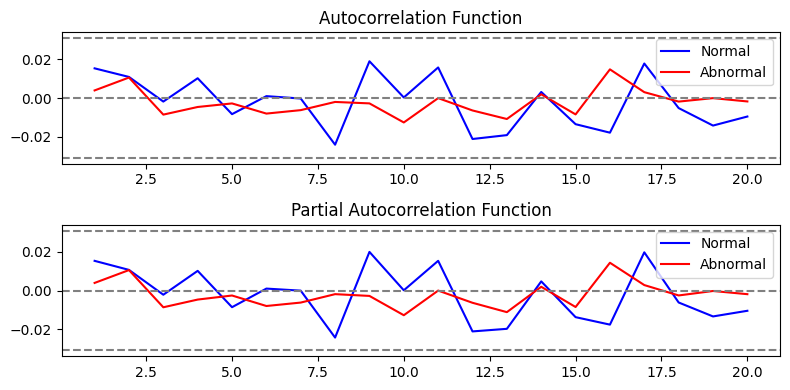

In [21]:
# Calculate ACF and PACF

lag_acf_abnormal = acf(anomaly_df['value'], nlags=20)[1:]  # Exclude lag-0
lag_acf_normal = acf(normal_df['value'], nlags=20)[1:]
lag_pacf_abnormal = pacf(anomaly_df['value'], nlags=20, method='ols')[1:]  # Exclude lag-0
lag_pacf_normal = pacf(normal_df['value'], nlags=20, method='ols')[1:]

lags = range(1, 21)  # Adjust lags to start from 1

# Plot ACF for normal and abnormal data
plt.figure(figsize=(8, 4))

plt.subplot(211)
plt.plot(lags, lag_acf_normal, label='Normal', color='blue')
plt.plot(lags, lag_acf_abnormal, label='Abnormal', color='red')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(normal_df)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(normal_df)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.legend()

# Plot PACF for normal and abnormal data
plt.subplot(212)
plt.plot(lags, lag_pacf_normal, label='Normal', color='blue')
plt.plot(lags, lag_pacf_abnormal, label='Abnormal', color='red')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(normal_df)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(normal_df)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.legend()

plt.tight_layout()
plt.show()

# What is a Lagged Version?

A lagged version of a time series is a shifted version of the original series.

# Why It Helps Identify Patterns and Seasonality

1. Autocorrelation:

Measures how current values of the series are related to past values (lags). High autocorrelation at specific lags indicates repeating patterns, suggesting seasonality or cycles.

2. Identifying Patterns:

If autocorrelation remains high at regular intervals, it indicates periodic behavior. For example, high autocorrelation at lag-12 in monthly sales data might indicate yearly seasonality.

3. Identifying Seasonality:

Regular peaks in the autocorrelation function suggest a seasonal effect. This helps in forecasting by incorporating seasonal components into the model.

4. Autocorrelation Function (ACF):

Calculates the correlation of the time series with its own lagged values. Helps identify how the values of the time series are related to their past values.

5. Partial Autocorrelation Function (PACF):

Calculates the correlation of the time series with its lagged values, removing the influence of the intermediate lags. Helps identify the direct impact of a particular lag.

# Results Interpretation

1. ACF:
Both normal and abnormal ECG signals show low autocorrelation after lag-1, indicating that the signals do not strongly depend on their past values beyond the immediate previous value. The autocorrelation at lag-1 is slightly higher, suggesting some immediate past influence.

2. PACF:
The PACF plot shows similar low values for both normal and abnormal signals, confirming the weak influence of lags beyond the first one. The values hover around zero, indicating that the current value is not significantly influenced by values beyond the immediate past.

# Conclusion

The results suggest that both normal and abnormal ECG signals have weak dependencies on past values beyond the immediate previous value. This information can be useful for building time series models and understanding the underlying structure of the ECG signals.